In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

c:\Users\Mohammed\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
df = pd.read_csv('NYC_Weather_2016_2022.csv')

In [3]:
df.head()

,time,temperature_2m (°C),precipitation (mm),rain (mm),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),windspeed_10m (km/h),winddirection_10m (°)
0,2016-01-01T00:00,7.6,0.0,0.0,69.0,53.0,0.0,72.0,10.0,296.0
1,2016-01-01T01:00,7.5,0.0,0.0,20.0,4.0,0.0,56.0,9.8,287.0
2,2016-01-01T02:00,7.1,0.0,0.0,32.0,3.0,0.0,99.0,9.7,285.0
3,2016-01-01T03:00,6.6,0.0,0.0,35.0,5.0,0.0,100.0,9.2,281.0
4,2016-01-01T04:00,6.3,0.0,0.0,34.0,4.0,0.0,100.0,9.1,279.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59760 entries, 0 to 59759
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   time                   59760 non-null  object 
 1   temperature_2m (°C)    59592 non-null  float64
 2   precipitation (mm)     59592 non-null  float64
 3   rain (mm)              59592 non-null  float64
 4   cloudcover (%)         59592 non-null  float64
 5   cloudcover_low (%)     59592 non-null  float64
 6   cloudcover_mid (%)     59592 non-null  float64
 7   cloudcover_high (%)    59592 non-null  float64
 8   windspeed_10m (km/h)   59592 non-null  float64
 9   winddirection_10m (°)  59587 non-null  float64
dtypes: float64(9), object(1)
memory usage: 4.6+ MB


Converting time to be datetime

In [5]:
df['time'] = pd.to_datetime(df['time'])

Firstly, worked with time, and let's continue on it

In [6]:
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month_name()
df['day'] = df['time'].dt.day_name()
df['quarter'] = df['time'].dt.quarter

In [7]:
df.sample(2)

,time,temperature_2m (°C),precipitation (mm),rain (mm),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),windspeed_10m (km/h),winddirection_10m (°),year,month,day,quarter
55958,2022-05-20 14:00:00,15.7,0.0,0.0,41.0,4.0,13.0,97.0,8.0,333.0,2022,May,Friday,2
3207,2016-05-13 15:00:00,17.8,0.0,0.0,100.0,98.0,97.0,96.0,7.9,156.0,2016,May,Friday,2


Working with parquet file

In [8]:
df_yellow = pd.read_parquet("yellow_tripdata_2025-03.parquet")

In [9]:
df_yellow.sample(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
4111214,2,2025-03-30 19:11:56,2025-03-30 19:39:49,NaN,5.24,NaN,None,143,148,0,34.64,0.0,0.5,0.0,0.0,1.0,39.39,NaN,NaN,0.75
1456993,2,2025-03-14 20:23:46,2025-03-14 20:27:33,1.0,1.31,1.0,N,74,75,1,7.20,1.0,0.5,0.0,0.0,1.0,9.70,0.0,0.0,0.00


In [10]:
df_yellow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4145257 entries, 0 to 4145256
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

As we can see when we use df.info() can't see the column about non-null count **The reason: cuz using very wide DataFrame and pandas truncating the output for display**

In [11]:
#Summary for it
summary = pd.DataFrame({
    'non_null':df_yellow.notnull().sum(),
    'null':df_yellow.isnull().sum(),
    'dtype':df_yellow.dtypes,
})
summary

,non_null,null,dtype
VendorID,4145257,0,int32
tpep_pickup_datetime,4145257,0,datetime64[us]
tpep_dropoff_datetime,4145257,0,datetime64[us]
passenger_count,3228594,916663,float64
trip_distance,4145257,0,float64
RatecodeID,3228594,916663,float64
store_and_fwd_flag,3228594,916663,object
PULocationID,4145257,0,int32
DOLocationID,4145257,0,int32
payment_type,4145257,0,int64


In [12]:
#set null values as the default value of 0
df_yellow['Airport_fee'].fillna(0,inplace=True)
df_yellow['congestion_surcharge'].fillna(0,inplace=True)
df_yellow['store_and_fwd_flag'].fillna(0,inplace=True)
df_yellow['RatecodeID'].fillna(0,inplace=True)
df_yellow['passenger_count'].fillna(0,inplace=True)

In [13]:
df_yellow.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
cbd_congestion_fee       0
dtype: int64

In [14]:
df_yellow.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee',
       'cbd_congestion_fee'],
      dtype='object')

In [15]:
#trip duration in minutes
df_yellow['trip_duration_min'] = (df_yellow['tpep_dropoff_datetime'] - df_yellow['tpep_pickup_datetime']).dt.total_seconds() / 60

trip duration

In [16]:
#Don't show missing data as we do as default value
df_yellow[df_yellow['passenger_count'] != 0]['passenger_count'].value_counts().sort_index()

passenger_count
1.0    2569487
2.0     442696
3.0     100511
4.0      64214
5.0      18616
6.0      10342
7.0          4
8.0          7
9.0          2
Name: count, dtype: int64

trip distance

In [17]:
df_distance = df_yellow[df_yellow['trip_distance'] != 0]
df_distance['trip_distance'].describe()

count    4.041535e+06
mean     6.753074e+00
std      6.343938e+02
min      1.000000e-02
25%      1.090000e+00
50%      1.840000e+00
75%      3.500000e+00
max      3.201363e+05
Name: trip_distance, dtype: float64

Fare amount

In [18]:
df_fare = df_yellow[df_yellow['fare_amount'] != 0]
df_fare['fare_amount'].describe()


count    4.143603e+06
mean     1.780745e+01
std      2.910508e+01
min     -9.990000e+02
25%      8.600000e+00
50%      1.350000e+01
75%      2.127000e+01
max      4.626388e+04
Name: fare_amount, dtype: float64

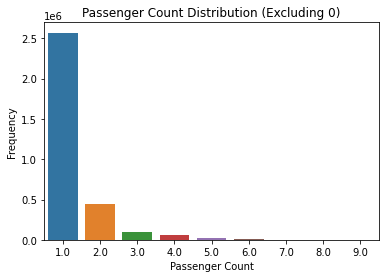

In [19]:
# Exclude zero passenger rides
df_passenger = df_yellow[df_yellow['passenger_count'] != 0]

sns.countplot(data=df_passenger, x='passenger_count')
plt.title("Passenger Count Distribution (Excluding 0)")
plt.xlabel("Passenger Count")
plt.ylabel("Frequency")
plt.show()

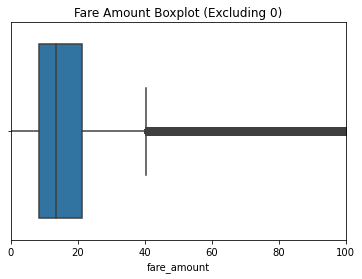

In [20]:
df_fare = df_yellow[df_yellow['fare_amount'] != 0]

sns.boxplot(x=df_fare['fare_amount'])
plt.title("Fare Amount Boxplot (Excluding 0)")
plt.xlim(0, 100)  # Optional: limit outliers
plt.show()


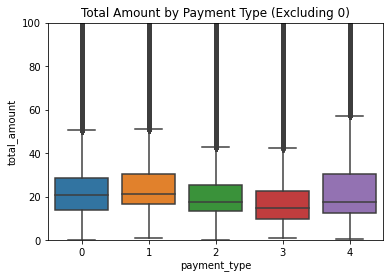

In [22]:
df_total = df_yellow[df_yellow['total_amount'] > 0]

sns.boxplot(data=df_total, x='payment_type', y='total_amount')
plt.title("Total Amount by Payment Type (Excluding 0)")
plt.ylim(0, 100)
plt.show()


In [23]:
df_zones = pd.read_csv('taxi_zone_lookup.csv')

In [24]:
df_yellow = df_yellow.merge(df_zones, left_on='PULocationID', right_on='LocationID', how='left')
df_yellow.rename(columns={'Borough': 'pickup_borough', 'Zone': 'pickup_zone'}, inplace=True)
df_yellow.drop(columns=['service_zone'], inplace=True)

In [25]:
df_yellow.sample(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee,trip_duration_min,LocationID,pickup_borough,pickup_zone
445653,2,2025-03-05 13:30:06,2025-03-05 13:35:01,1.0,0.55,1.0,N,249,249,1,...,0.0,1.0,13.25,2.5,0.0,0.75,4.916667,249,Manhattan,West Village
3268563,2,2025-03-01 22:49:09,2025-03-01 22:59:23,0.0,0.72,0.0,0,4,148,0,...,0.0,1.0,15.20,0.0,0.0,0.75,10.233333,4,Manhattan,Alphabet City


**Top Pickup Boroughs**

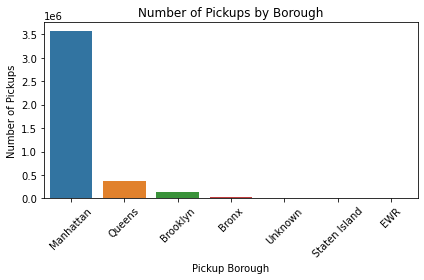

In [26]:
pickup_borough_counts = df_yellow['pickup_borough'].value_counts()

sns.barplot(x=pickup_borough_counts.index, y=pickup_borough_counts.values)
plt.title("Number of Pickups by Borough")
plt.xlabel("Pickup Borough")
plt.ylabel("Number of Pickups")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Top 15 Pickup Zones**

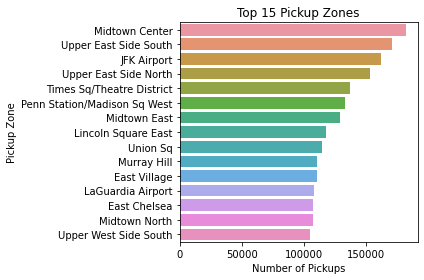

In [27]:
top_zones = df_yellow['pickup_zone'].value_counts().head(15)

sns.barplot(y=top_zones.index, x=top_zones.values)
plt.title("Top 15 Pickup Zones")
plt.xlabel("Number of Pickups")
plt.ylabel("Pickup Zone")
plt.tight_layout()
plt.show()

**Hourly Demand for Top Pickup Zones**

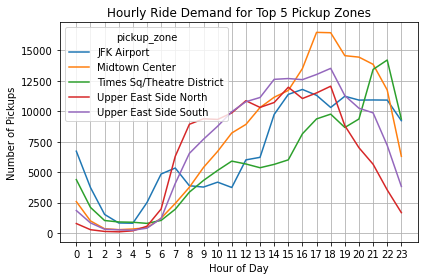

In [28]:
# Extract hour from pickup time
df_yellow['hour'] = df_yellow['tpep_pickup_datetime'].dt.hour

# Top 5 zones overall
top5_zones = df_yellow['pickup_zone'].value_counts().head(5).index

# Filter only those zones
df_top_zones = df_yellow[df_yellow['pickup_zone'].isin(top5_zones)]

# Group by zone and hour
zone_hour = df_top_zones.groupby(['pickup_zone', 'hour']).size().reset_index(name='count')

sns.lineplot(data=zone_hour, x='hour', y='count', hue='pickup_zone')
plt.title("Hourly Ride Demand for Top 5 Pickup Zones")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Pickups")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()